# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sat_scores = pd.read_csv('./sat.csv')
act_scores = pd.read_csv('./act.csv')

##### 2. Print the first ten rows of each dataframe.

Removing the 'Unnamed: 0' column, as it's a repeated index.

In [3]:
sat_scores = sat_scores.drop(columns='Unnamed: 0')

In [4]:
sat_scores.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


There's an error with the datasheet - Line 20/Maryland shows a two-digit value for the Math score, 
which does not add up to the total. Upon checking the data source, it's confirmed that the last digit
was dropped when making the table. I've updated the value to reflect the correct value.

In [5]:
sat_scores.iat[20, 3] = 524

Removing the 'Unnamed: 0' column, as it's a repeated index.

In [6]:
act_scores = act_scores.drop(columns='Unnamed: 0')

In [7]:
act_scores.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


##### 3. Describe in words what each variable (column) is.

The headers of the columns show the categories for the data/variables - State, Participation percentage, Subject scores, and total score.

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [8]:
sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [9]:
act_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


At a first glance, the data had 1 wrong variable (Maryland Math SAT score). 

Otherwise, the data does not appear to have other issues. It would be better if the complete/raw data were available.

##### 5. Print the types of each column.

In [10]:
sat_scores.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

Yes - the 'Participation' column needs to be re-assigned to a float.

In [11]:
sat_scores['Participation'] = pd.to_numeric((sat_scores['Participation'].str.replace('%', '')),downcast='float')
act_scores['Participation'] = pd.to_numeric((act_scores['Participation'].str.replace('%', '')),downcast='float')

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [12]:
sat_math = dict(zip(sat_scores['State'], sat_scores['Math']))
sat_rw = dict(zip(sat_scores['State'], sat_scores['Evidence-Based Reading and Writing']))
sat_total = dict(zip(sat_scores['State'], sat_scores['Total']))

In [13]:
act_english = dict(zip(act_scores['State'], act_scores['English']))
act_math = dict(zip(act_scores['State'], act_scores['Math']))
act_reading = dict(zip(act_scores['State'], act_scores['Reading']))
act_science = dict(zip(act_scores['State'], act_scores['Science']))
act_composite = dict(zip(act_scores['State'], act_scores['Composite']))

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [14]:
sat_scores_dict = sat_scores.to_dict()

In [15]:
act_scores_dict = act_scores.to_dict()

##### 9. Merge the dataframes on the state column.

In [16]:
sat_act = pd.merge(sat_scores, act_scores, on='State')

In [17]:
sat_act.head()

,State,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [18]:
new_columns_dict = {
        'State':'state',
        'Participation_x':'sat_participation',
        'Evidence-Based Reading and Writing':'sat_rw',
        'Math_x':'sat_math',
        'Total':'sat_total',
        'Participation_y':'act_participation',
        'English':'act_english',
        'Math_y':'act_math',
        'Reading':'act_reading',
        'Science':'act_science',
        'Composite':'act_composite'
    }

sat_act.rename(columns = new_columns_dict, inplace=True)

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [19]:
satact_max = sat_act.max()
satact_max = satact_max.replace('Wyoming', 'Max Values')

In [20]:
satact_min = sat_act.min()
satact_min = satact_min.replace('Alabama', 'Min Values')

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.


$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [21]:
col_names = sat_act.columns

In [22]:
def std_dev(df,col_names):
    sd = [(np.sqrt((1/len(df[col_name]))*sum((df[col_name]-np.mean(df[col_name]))**2))) for col_name in col_names]
    return sd
std_dev = std_dev(sat_act,col_names[1:])
std_dev

[34.92907061597509,
 45.21697020437866,
 46.65713364485503,
 91.58351056778743,
 31.824175725011866,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 3.1511078954644076,
 2.000786081581989]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [23]:
sat_act.loc[51]  =  ["sd"]  +  std_dev
sat_act.tail()

,state,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
47,Washington,64.000000,541.00000,534.000000,1075.000000,29.000000,20.900000,21.900000,22.100000,22.000000,21.900000
48,West Virginia,14.000000,558.00000,528.000000,1086.000000,69.000000,20.000000,19.400000,21.200000,20.500000,20.400000
49,Wisconsin,3.000000,642.00000,649.000000,1291.000000,100.000000,19.700000,20.400000,20.600000,20.900000,20.500000
50,Wyoming,3.000000,626.00000,604.000000,1230.000000,100.000000,19.400000,19.800000,20.800000,20.600000,20.200000
51,sd,34.929071,45.21697,46.657134,91.583511,31.824176,2.330488,1.962462,2.046903,3.151108,2.000786


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [24]:
sat_sorted = sat_act.sort_values('sat_participation', ascending=False)
sat_sorted.head()

,state,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
22,Michigan,100.0,509.0,495.0,1005.0,29.0,24.1,23.7,24.5,23.8,24.1
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,25.5


In [25]:
act_sorted = sat_act.sort_values('act_participation', ascending=False)

In [26]:
sat_sorted = sat_act.sort_values('sat_total', ascending=False)
sat_sorted.head()

,state,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,21.5
49,Wisconsin,3.0,642.0,649.0,1291.0,100.0,19.7,20.4,20.6,20.9,20.5
15,Iowa,2.0,641.0,635.0,1275.0,67.0,21.2,21.3,22.6,22.1,21.9
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,20.4
16,Kansas,4.0,632.0,628.0,1260.0,73.0,21.1,21.3,22.3,21.7,21.7


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [27]:
sat_act[(sat_act['sat_participation'] > 50.0) & (sat_act['act_participation'] > 50.0)]

,state,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,19.8
10,Georgia,61.0,535.0,515.0,1050.0,55.0,21.0,20.9,22.0,21.3,21.4
11,Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,19.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

Text(0,0.5,'# of States')

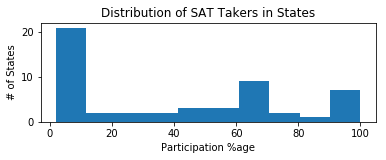

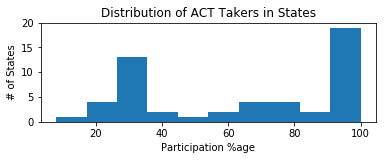

In [28]:
plt.figure(1)
plt.subplot(211)
plt.hist(sat_act.sat_participation)
plt.title('Distribution of SAT Takers in States')
plt.xlabel('Participation %age')
plt.ylabel('# of States')

plt.figure(2)
plt.subplot(212)
plt.hist(sat_act.act_participation)
plt.title('Distribution of ACT Takers in States')
plt.xlabel('Participation %age')
plt.ylabel('# of States')

Text(0,0.5,'Quantity by State')

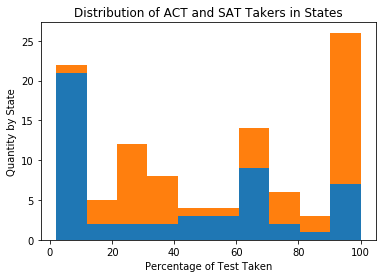

In [29]:
plt.hist((sat_act.sat_participation, sat_act.act_participation), stacked=True);
plt.title('Distribution of ACT and SAT Takers in States')
plt.xlabel('Percentage of Test Taken')
plt.ylabel('Quantity by State')

##### 17. Plot the Math(s) distributions from both data sets.

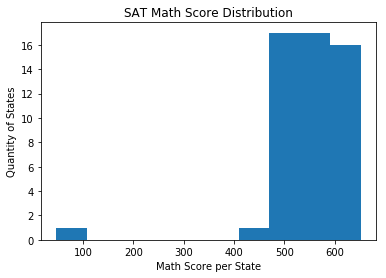

In [30]:
plt.hist(sat_act.sat_math);
plt.xlabel('Math Score per State')
plt.ylabel('Quantity of States')
plt.title('SAT Math Score Distribution');

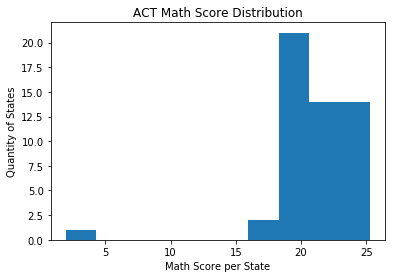

In [31]:
plt.hist(sat_act.act_math);
plt.xlabel('Math Score per State')
plt.ylabel('Quantity of States')
plt.title('ACT Math Score Distribution');

##### 18. Plot the Verbal distributions from both data sets.

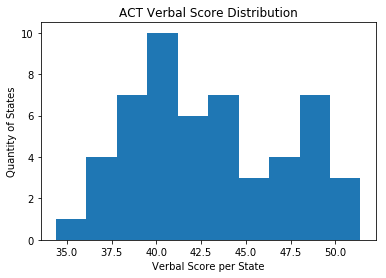

In [32]:
sat_act['act_verbal'] = act_scores['English'] + act_scores['Reading']

plt.hist(sat_act.act_verbal);
plt.xlabel('Verbal Score per State')
plt.ylabel('Quantity of States')
plt.title('ACT Verbal Score Distribution');

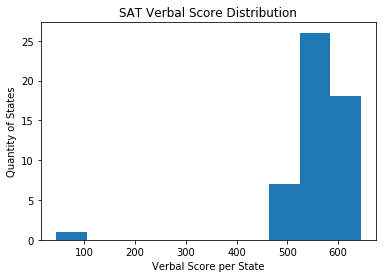

In [33]:
plt.hist(sat_act.sat_rw);
plt.xlabel('Verbal Score per State')
plt.ylabel('Quantity of States')
plt.title('SAT Verbal Score Distribution');

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

We assume the data will be normally distributed - random samples from population, sample size > 30 (what conditions Central Limit Theorem applies), mean is normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

This assumption does not hold true for this dataset, as it is not a random sample.

##### 21. Plot some scatterplots examining relationships between all variables.

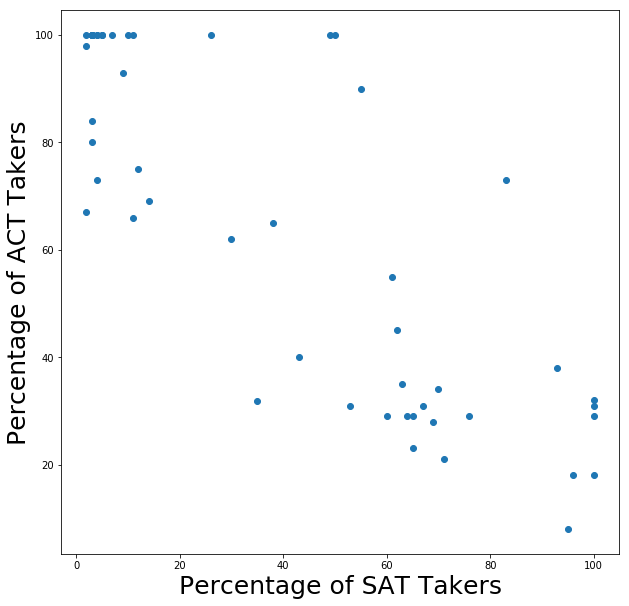

In [34]:
plt.figure(figsize=(10,10))
plt.xlabel('Percentage of SAT Takers', {'fontsize': 25,
        'fontweight' : 10})
plt.ylabel('Percentage of ACT Takers', {'fontsize': 25,
        'fontweight' : 10})
plt.scatter(sat_act.sat_participation,  sat_act.act_participation)
plt.savefig('SATvsACT.png')

<Figure size 1080x1080 with 0 Axes>

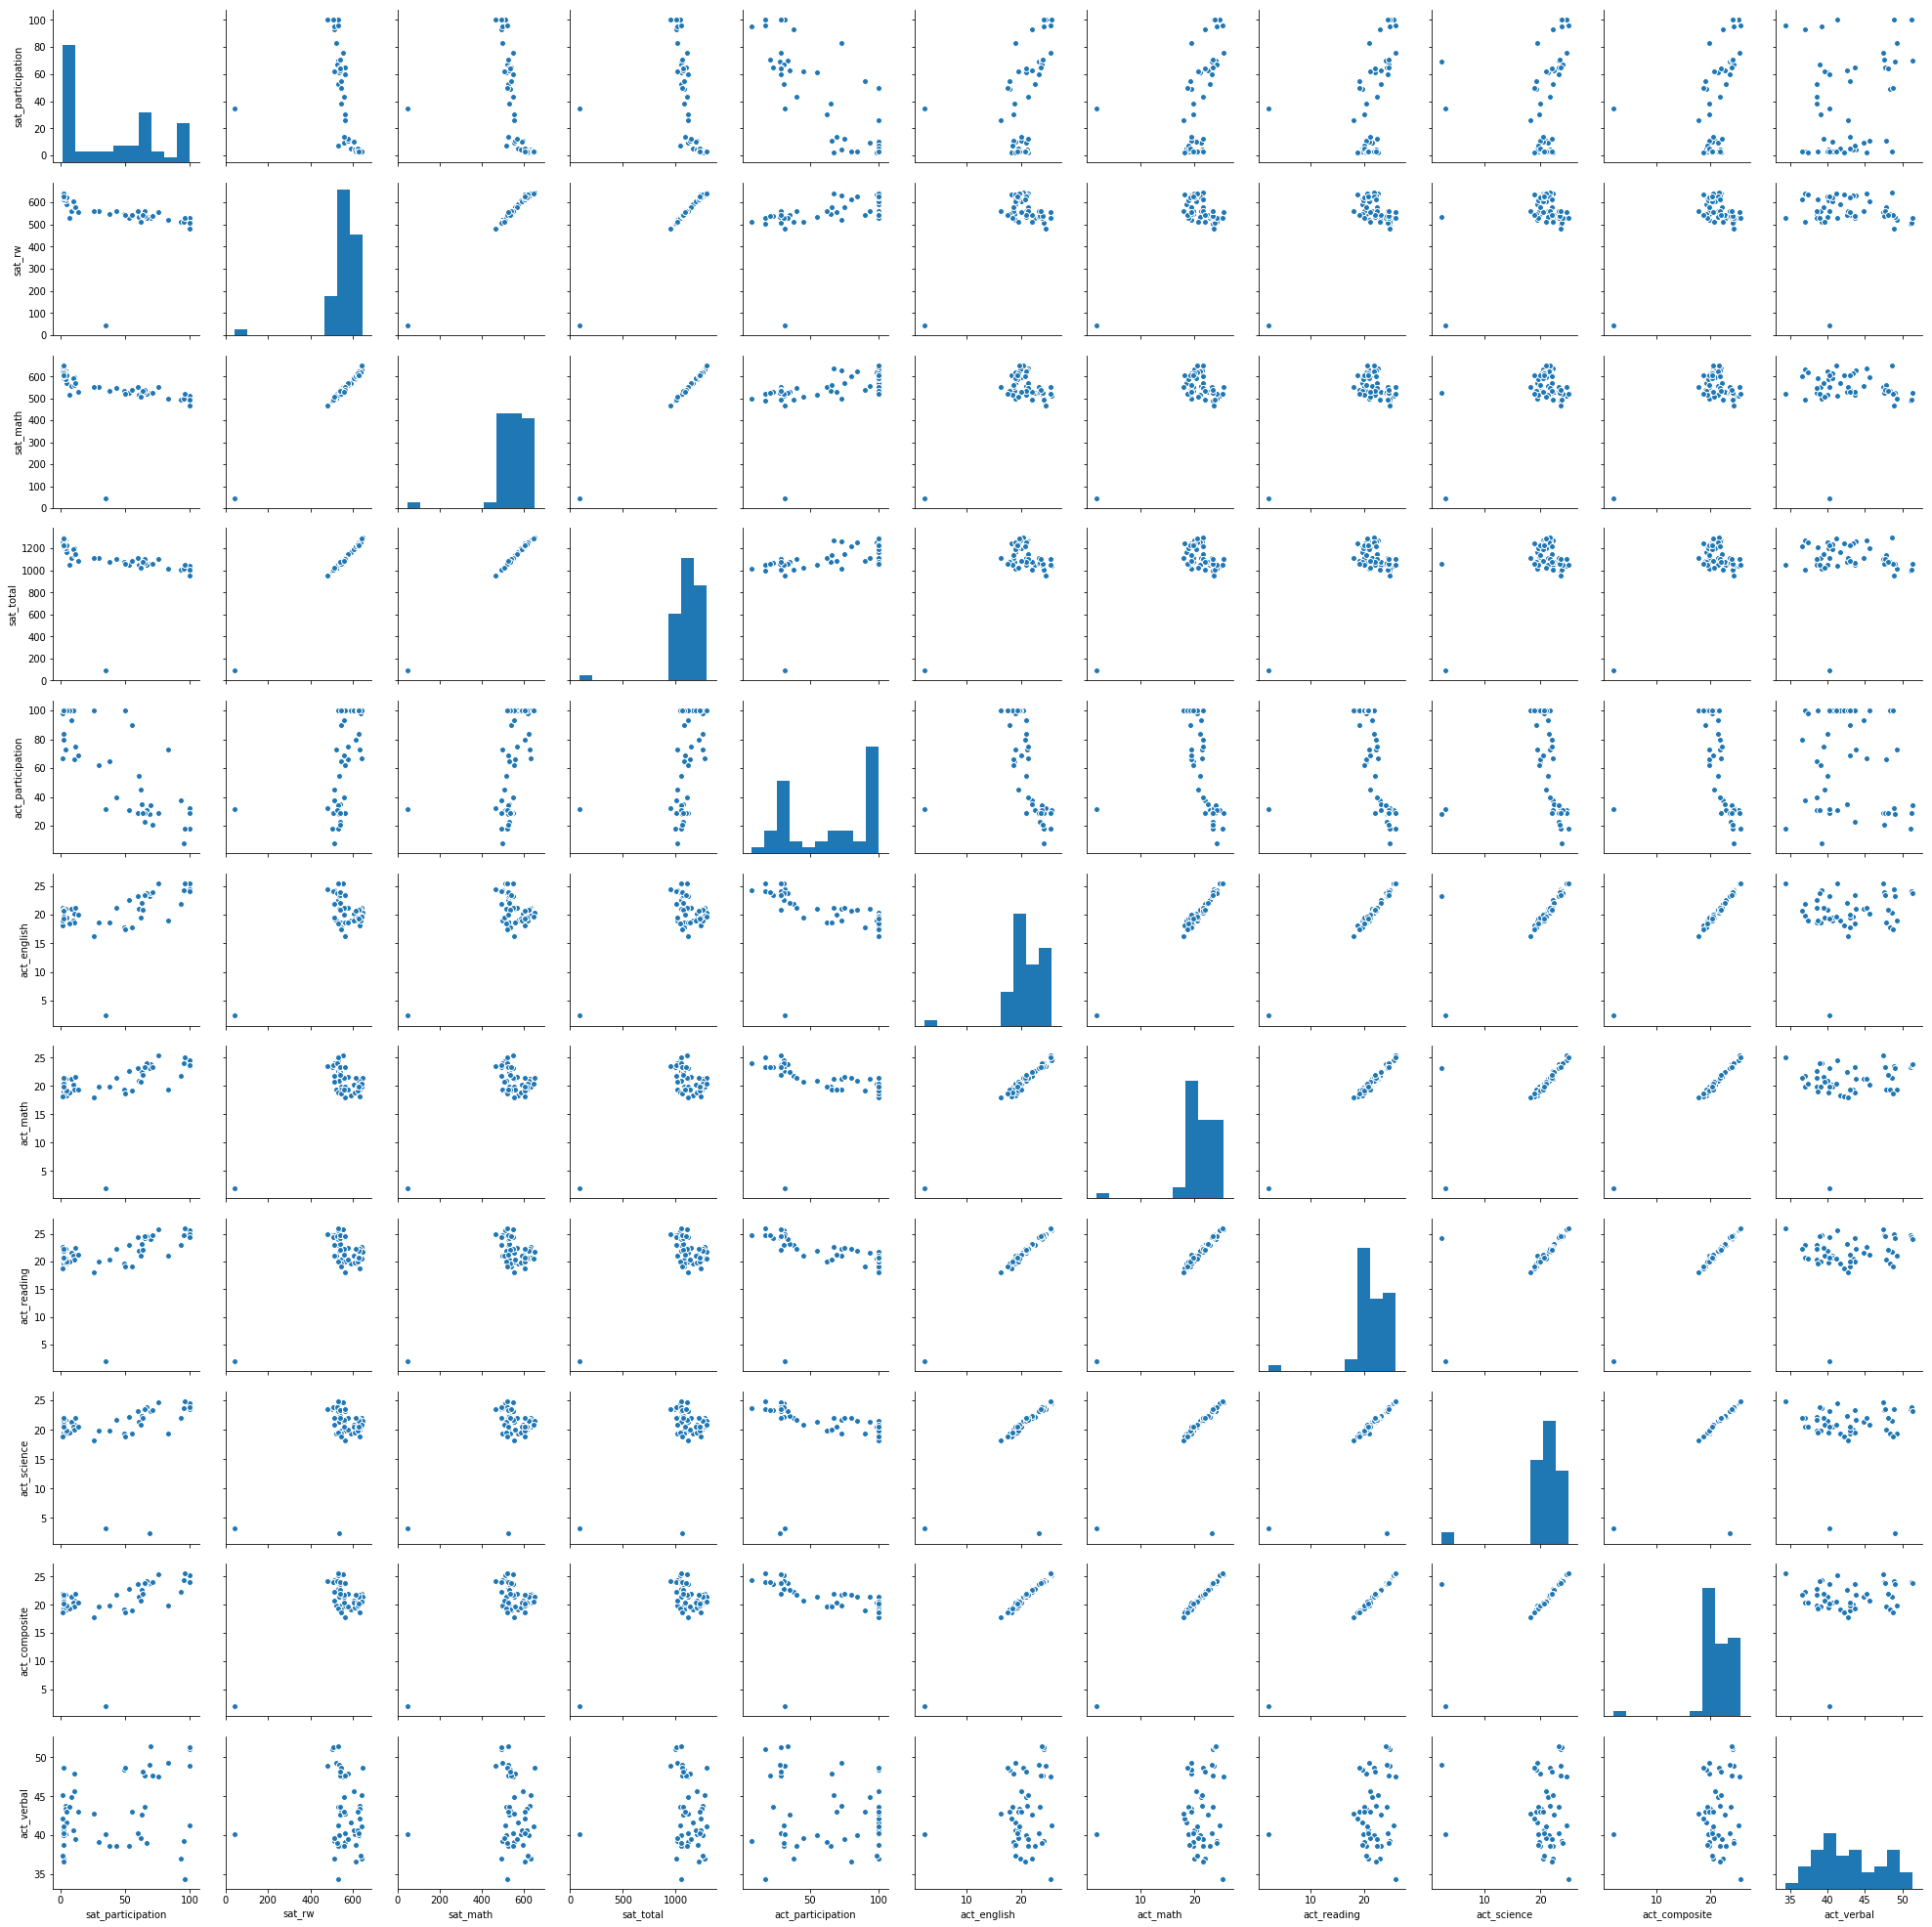

In [35]:
plt.figure(figsize=(15,15))
sns.pairplot(sat_act)
plt.savefig('test.png')

##### 22. Are there any interesting relationships to note?

There appears to be a direct inverse relationship between the participation in SAT vs. ACT by state -
those with 100% participation in one test show below average participation in the other.

The SAT appears to have a negative correlation between participation and scores.

The ACT scores have a positive linear relationship between the different subjects - this makes sense intuitively, as students who do well in one particular subject is likely to do well in the others, and vice versa.


##### 23. Create box plots for each variable. 

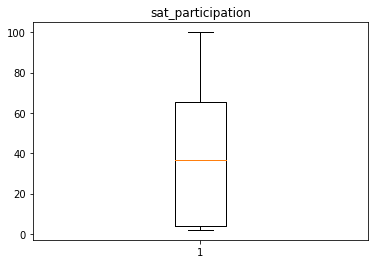

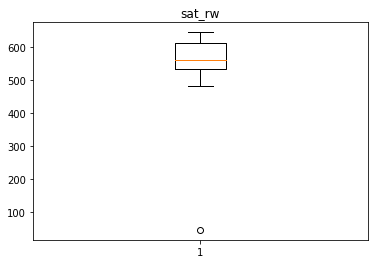

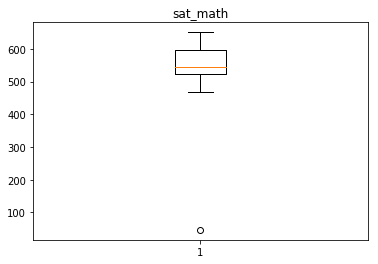

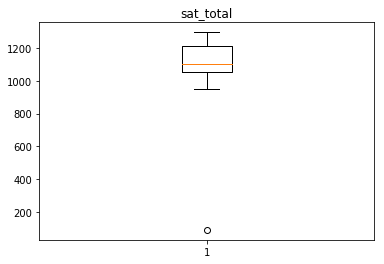

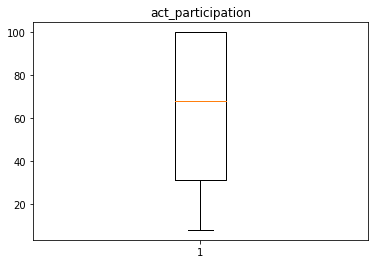

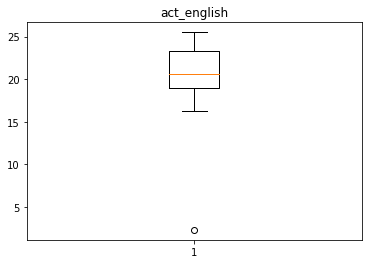

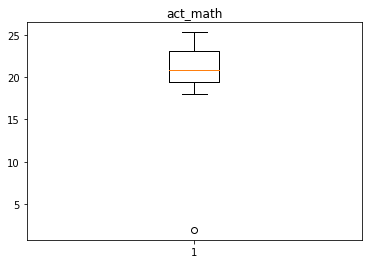

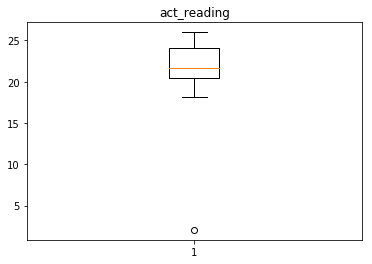

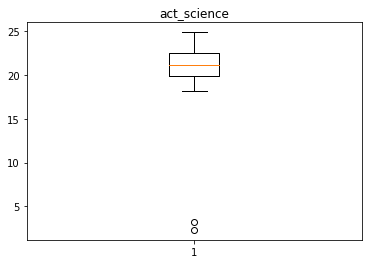

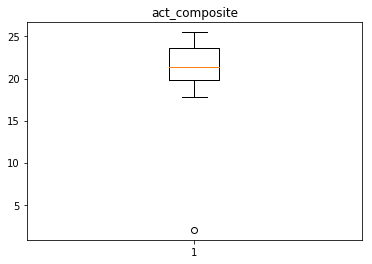

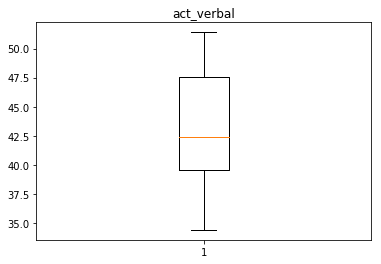

In [36]:
def box_plot(df, list_of_columns = [], remove_columns=[]):
    if len(list_of_columns) == 0:
        list_of_columns = df.drop(columns=remove_columns).columns
    for column in list_of_columns:
        if df[column].dtype != object:
            plt.figure()
            plt.title(column)
            plt.boxplot(df[column])
        
box_plot(sat_act)

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [37]:
sat_act_corr = sat_act.corr()

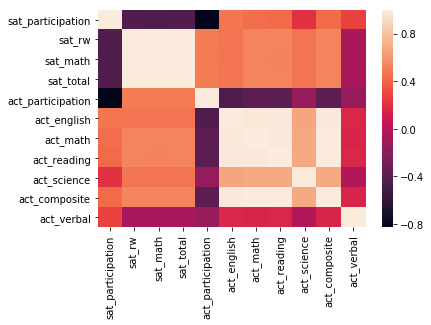

In [38]:
sns.heatmap(sat_act_corr);

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

SAT Participation 

Distribution is skewed right. 

Mean = 39.71
Median = 36.64
Standard Dev = 34.93

The median is lower than the mean by more than a few points, which suggests that this distribution will be skewed right. Additionally, the high standard deviation indicates that the distribution is spread out and not normal/centered. The histogram is concentrated on the lower end of the plot (closer to 0), but the distribution is too uneven to consider it normalized on the right.

ACT Participation 

Distribution is skewed left

Mean = 64.62
Median = 68.0
Standard Dev = 32.15

The median is greater than the mean by more than a few points, which suggests that this distribution will be skewed left. Additionally, the high standard deviation indicates that the distribution is spread out and not normal/centered.

In [39]:
sat_act.describe()

,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite,act_verbal
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,39.710174,559.042634,547.070329,1106.203529,64.612003,20.573663,20.812740,21.629748,20.697137,21.144246,42.921154
std,34.935612,85.573831,84.753938,170.201937,32.160080,3.476332,3.309862,3.443344,4.010533,3.365972,4.365522
min,2.000000,45.216970,46.657134,91.583511,8.000000,2.330488,1.962462,2.046903,2.300000,2.000786,34.400000
25%,4.000000,531.750000,522.500000,1054.250000,31.000000,19.000000,19.400000,20.400000,19.875000,19.800000,39.575000
50%,36.464535,558.500000,544.500000,1104.500000,68.000000,20.550000,20.900000,21.700000,21.100000,21.400000,42.400000
75%,65.500000,612.500000,597.000000,1210.000000,100.000000,23.300000,23.100000,24.125000,22.525000,23.600000,47.525000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,51.400000


##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [40]:
sat_act.corr()

,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite,act_verbal
sat_participation,1.000000,-0.445476,-0.454486,-0.450415,-0.829503,0.474754,0.436885,0.434780,0.207224,0.428452,0.281226
sat_rw,-0.445476,1.000000,0.995890,0.998985,0.496847,0.466543,0.531369,0.529283,0.468949,0.534987,-0.069274
sat_math,-0.454486,0.995890,1.000000,0.998949,0.492177,0.464208,0.535027,0.526539,0.469664,0.534618,-0.066464
sat_total,-0.450415,0.998985,0.998949,1.000000,0.495020,0.466011,0.533869,0.528557,0.469922,0.535477,-0.067776
act_participation,-0.829503,0.496847,0.492177,0.495020,1.000000,-0.452602,-0.389151,-0.393865,-0.147958,-0.388838,-0.134089
act_english,0.474754,0.466543,0.464208,0.466011,-0.452602,1.000000,0.982201,0.989608,0.671518,0.991539,0.163760
act_math,0.436885,0.531369,0.535027,0.533869,-0.389151,0.982201,1.000000,0.992819,0.690217,0.996633,0.152307
act_reading,0.434780,0.529283,0.526539,0.528557,-0.393865,0.989608,0.992819,1.000000,0.684772,0.998258,0.161813
act_science,0.207224,0.468949,0.469664,0.469922,-0.147958,0.671518,0.690217,0.684772,1.000000,0.688307,-0.036560
act_composite,0.428452,0.534987,0.534618,0.535477,-0.388838,0.991539,0.996633,0.998258,0.688307,1.000000,0.154175


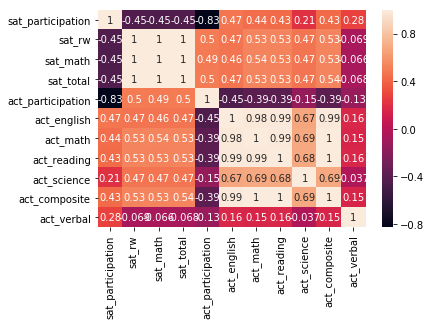

In [41]:
sns.heatmap(sat_act.corr(), annot=True)

There appears to be a direct inverse relationship between the participation in SAT vs. ACT by state -
those with 100% participation in one test show below average participation in the other.

The SAT appears to have a negative correlation between participation and scores.

The ACT scores have a positive linear relationship between the different subjects - this makes sense intuitively, as students who do well in one particular subject is likely to do well in the others, and vice versa.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

$H_0$ = The difference in the mean of the SAT and ACT participation rates is zero

$H_1$ = The difference in the mean of the SAT and ACT participation rates is a non-zero integer

In [42]:
control = np.asarray(sat_act.sat_participation)
experimental = np.asarray(sat_act.act_participation)

stats.ttest_ind_from_stats(control.mean(), control.std(), len(control), experimental.mean(), experimental.std(), len(experimental))

Ttest_indResult(statistic=-3.818551015436153, pvalue=0.00023069213129559634)

In [43]:
stats.ttest_ind(control, experimental)

Ttest_indResult(statistic=-3.781655937477635, pvalue=0.0002627991972288668)

P is less than the alpha value; therefore, there is sufficient evidence to reject the null hypothesis.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [44]:
sat_sample_mean = sat_act.sat_participation.mean()
sat_z_star = 1.96 # number of std deviations away from the mean that gives us 95% conf interval
sat_sigma = sat_act.sat_participation.std()
sat_n = len(sat_act.sat_participation)

sat_low_end = sat_sample_mean - sat_z_star * sat_sigma / sat_n ** 0.5
sat_high_end = sat_sample_mean + sat_z_star * sat_sigma / sat_n ** 0.5

(sat_low_end,sat_high_end)

(30.21456691920369, 49.205781950641494)

In [45]:
act_sample_mean = sat_act.act_participation.mean()
act_z_star = 1.96 # number of std deviations away from the mean that gives us 95% conf interval
act_sigma = sat_act.act_participation.std()
act_n = len(sat_act.act_participation)

act_low_end = act_sample_mean - act_z_star * act_sigma / act_n ** 0.5
act_high_end = act_sample_mean + act_z_star * act_sigma / act_n ** 0.5

(act_low_end,act_high_end)

(55.870794134244825, 73.35321262440947)

Interpretation - 95% probability that repeating this experiment with a new sample, the mean will fall within the specified range/alpha.

The confidence interval for both participation rate distributions are quite wide - this indicates that the sample size is likely too small to be analyzed effectively.


##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

This data does not give a meaningful representation of population of graduating HS students because of the non-random sampling. The experiment is non-repeatable because of the way the samples were picked (stratified) - because the information was collected by the state and the population was distributed by state rather than as a population as a whole. The experiment is additionally non-repeatable with the same population over time (new population with new HS graduating class, new population. New test, new population. etc)

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

No - the math scores were derived from non-random samples from a population that is not repeatable, and there is an unknown intersection between SAT and ACT test takers; so it is unlikely that these variables have any dependence or effect on each other.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

I believe that the data is insufficient - some assumptions can be made based on the given dataset, but the conclusions would not be very explanatory. The most this data can provide is a possible relation between SAT and ACT participation rates; not regarding scores.

The data would be a better representative if the data were from a randomized sample from a national population rather than broken by state, and performed in a repeatable manner.